In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
df = pd.read_csv("BostonHousing.csv")

In [78]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [79]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [80]:
# Check for missing values
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,5
age,0
dis,0
rad,0
tax,0


In [81]:
df.dtypes

,0
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64


In [82]:
# Handle missing values by imputing with the mean of the column
df.fillna(df.mean(), inplace=True)

# Verify that there are no more missing values
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


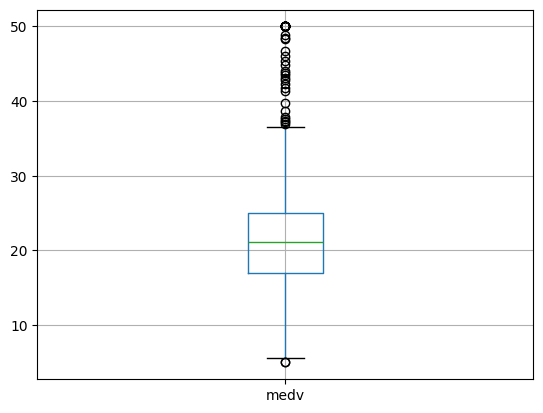

In [83]:
col=['medv']
df.boxplot(col)
plt.show()

In [84]:
df = df[df['medv'] <= 35]

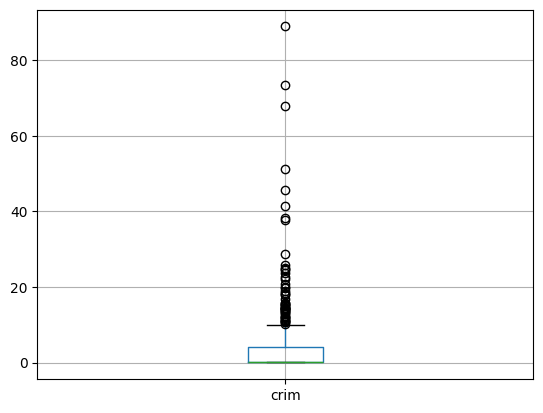

In [85]:
col=['crim']
df.boxplot(col)
plt.show()

In [86]:
df = df[df['crim'] <= 5]

In [87]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,356.000000,356.00000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,0.641382,13.09691,9.722416,0.070225,0.525615,6.204024,62.603652,4.338976,5.786517,346.806180,18.239607,376.127416,11.492809,22.195787
std,1.129423,24.12324,6.563878,0.255885,0.109428,0.515259,28.074342,2.113611,5.246535,117.891734,2.106069,52.349668,5.758189,5.143804
min,0.006320,0.00000,0.740000,0.000000,0.385000,3.561000,2.900000,1.321600,1.000000,187.000000,12.600000,10.480000,1.980000,7.000000
25%,0.064537,0.00000,4.950000,0.000000,0.442000,5.887250,38.375000,2.538450,4.000000,277.000000,16.800000,380.177500,7.170000,19.000000
50%,0.146710,0.00000,7.870000,0.000000,0.507000,6.151500,66.550000,3.945400,5.000000,307.000000,18.500000,392.715000,10.285000,21.750000
75%,0.524685,20.25000,13.095000,0.000000,0.573000,6.498750,88.850000,5.720900,5.000000,398.000000,20.125000,396.285000,14.432500,24.600000
max,4.871410,100.00000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,34.900000


# Exploratory Data Analysis


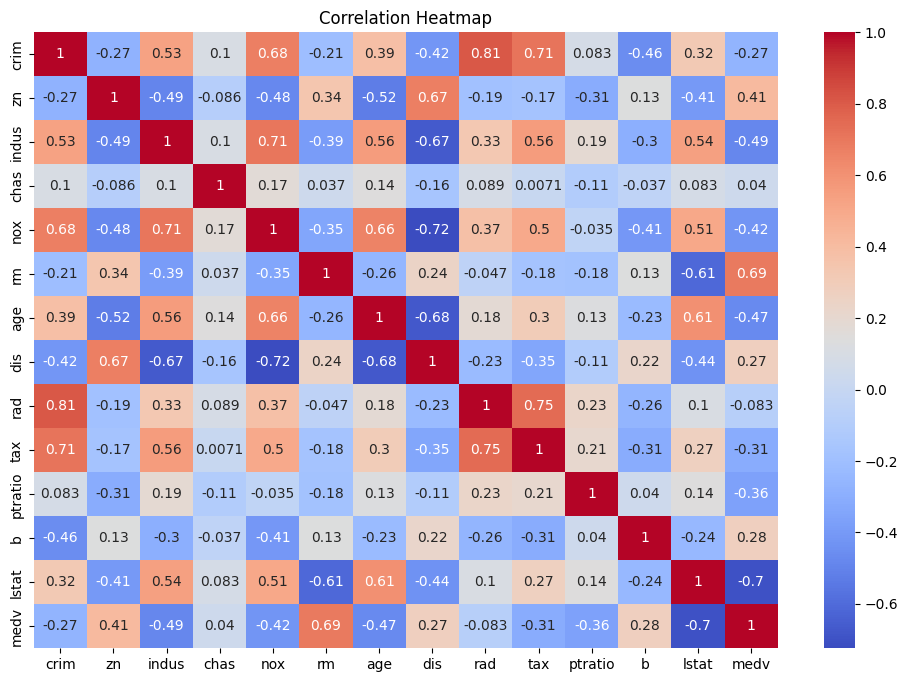

In [88]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

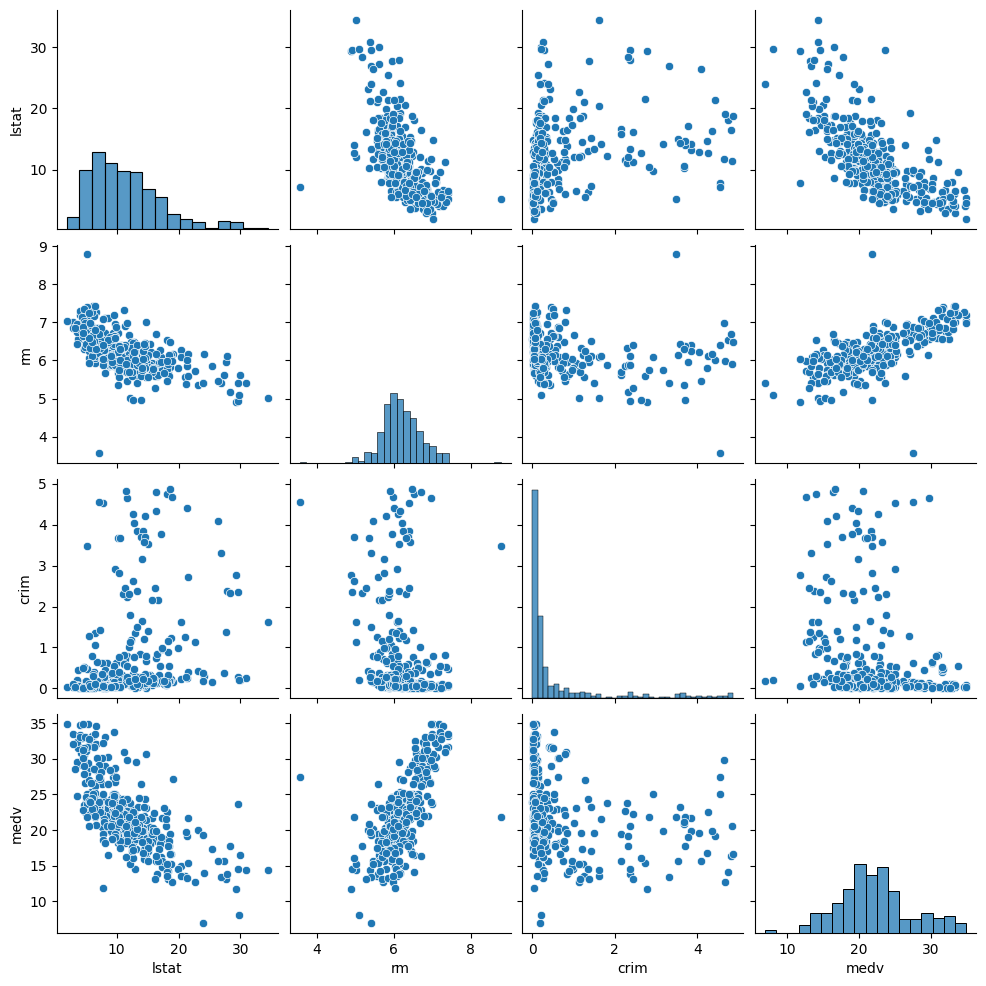

In [89]:
# Pair plot
sns.pairplot(df[['lstat', 'rm', 'crim', 'medv']])
plt.show()

In [90]:
# Define features and target variable
X = df[['lstat', 'rm', 'crim','ptratio']]
y = df['medv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(6.433346817096536, 0.7462911684338288)

In [91]:
y_test.head(5)

,medv
310,16.1
301,22.0
292,27.9
490,8.1
307,28.2


In [92]:
y_pred

array([16.88797396, 25.57476469, 26.0588041 , 10.5150178 , 26.15192439,
       24.54028806, 15.92320233, 21.30566667, 17.92019001, 14.60776846,
       21.54285757, 20.45452839, 22.18742244, 22.61280327, 27.74451279,
       25.15240102, 21.01864474, 18.17680879, 20.17328593, 18.01323041,
       23.53056718, 19.37779836, 21.52779637, 19.06382656, 20.24081363,
       22.94861215, 24.14899031, 23.64607964, 20.09759066, 21.81224976,
       21.25254717, 25.65350922, 25.11117524, 18.09762335, 20.56397046,
       19.90679497, 18.18013263, 26.10468557, 27.78347124, 19.35326206,
       24.10940521, 21.75359285, 21.88231779, 26.42078993, 21.68187245,
       21.67988938, 19.79162885, 24.10070237, 27.73641129, 19.10009846,
       21.39927268, 23.2190582 , 17.59646981, 25.38417378, 23.86020289,
       16.9389477 , 19.97579472, 27.74992684, 28.13614894, 12.03424785,
       21.32358236, 16.90441382, 20.33276749, 27.82288169, 18.70275492,
       25.53841429, 24.57452125, 19.05189851, 28.83624003, 22.37